In [2]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z 
        
    def multiply(self, multiplier):
        return Point(self.x * multiplier, self.y * multiplier, self.z * multiplier)
    
    def divide(self, divider):
        return Point(self.x / divider, self.y / divider, self.z / divider)
    
    def __add__(self, otherPoint):
        return Point(self.x + otherPoint.x, self.y + otherPoint.y, self.z + otherPoint.z)
    
    def __sub__(self, otherPoint):
        return Point(self.x - otherPoint.x, self.y - otherPoint.y, self.z - otherPoint.z)
        
        
class deCasteljau:
    def __init__(self, points):
        self.points = points
    
    def b(self,r,i,t):
        
        #print("r: ", r)
        #print("i: ", i)
        
        if r == 0:
            return self.points[i];
        
        return  self.b(r - 1, i, t).multiply(1 - t) +  self.b(r - 1, i + 1, t).multiply(t)
    
def factorial(n):
    fact = 1
    for i in range(1,n+1): 
        fact = fact * i 
    return fact

def binomial(n, i):
    if (i >= 0 and i <= n):
        return factorial(n)/(factorial(i) * factorial(n - i))
    else:
        return 0
    
class Berstein:

    def B(self, n, i, t):
        
        if (n == 0 and i == 0):
            return 1
        elif (i > n or i < 0):
            return 0
        
        return (1 - t) * self.B(n - 1, i, t) + t * self.B(n - 1, i - 1, t)

6


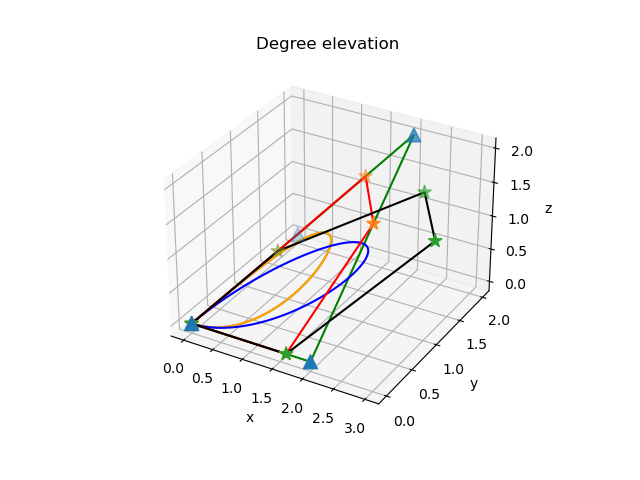

In [4]:
#5.1 p64
#Degree elevation

import copy

from mpl_toolkits import mplot3d


%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt

points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]


newpoints = list()

newpoints.append(points[0])

framexnew = list()
frameynew = list()
frameznew = list()

framexnew.append(points[0].x)
frameynew.append(points[0].y)
frameznew.append(points[0].z)

n = 4

for i in range(1, n + 1, 1):
    p = points[i  - 1].multiply(i /(n + 1)) + points[i].multiply(1 - i / (n + 1))
    newpoints.append(p)
    framexnew.append(p.x)
    frameynew.append(p.y)
    frameznew.append(p.z)
    
newpoints.append(points[4])

framexnew.append(points[4].x)
frameynew.append(points[4].y)
frameznew.append(points[4].z)

print(len(newpoints))
    
framex = [0,0,2,2,0]
framey = [0,2,2,0,0]
framez = [0,0,2,0,0]

newpoints2 = copy.deepcopy(newpoints)
newpoints2[2].x = newpoints2[2].x + 1
newpoints2[3].x = newpoints2[3].x + 1

dc = deCasteljau(points)
dcnew = deCasteljau(newpoints)
dcnew2 = deCasteljau(newpoints2)

xline = list()
yline = list()
zline = list()

xlinenew = list()
ylinenew = list()
zlinenew = list()

xlinenew2 = list()
ylinenew2 = list()
zlinenew2 = list()

xframenew2 = list()
yframenew2 = list()
zframenew2 = list()

for i in newpoints2:
    xframenew2.append(i.x)
    yframenew2.append(i.y)
    zframenew2.append(i.z)


for i in np.arange(0.0, 1.0, 0.01):
    p = dc.b(4,0,i)
    
    xline.append(p.x)
    yline.append(p.y)
    zline.append(p.z)
    
for i in np.arange(0.0, 1.0, 0.01):
    p = dcnew.b(5,0,i)
    xlinenew.append(p.x)
    ylinenew.append(p.y)
    zlinenew.append(p.z)
    
for i in np.arange(0.0, 1.0, 0.01):
    p = dcnew2.b(5,0,i)
    
    xlinenew2.append(p.x)
    ylinenew2.append(p.y)
    zlinenew2.append(p.z)    

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Degree elevation')

ax.plot3D(xline, yline, zline, 'gray')
ax.plot3D(framex, framey, framez, 'green')
ax.plot3D(xlinenew, ylinenew, zlinenew, 'orange')
ax.plot3D(xlinenew2, ylinenew2, zlinenew2, 'blue')
ax.plot3D(framexnew, frameynew, frameznew, 'red')
ax.plot3D(xframenew2, yframenew2, zframenew2, 'black')

ax.scatter(framex, framey, framez, marker='^',s=100)
ax.scatter(framexnew, frameynew, frameznew, marker='*',s=100)
ax.scatter(xframenew2, yframenew2, zframenew2, marker='*',s=100)

plt.show()